In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
from winkie import ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sn

In [ ]:
df = pd.read_hdf("labelled_merged.h5")
df

bodyparts        head                               beak              \
coords              x           y likelihood           x           y   
0          716.210449  253.077591   0.999999  685.722412  249.250351   
1          716.454956  252.469467   0.999999  685.662415  249.108215   
2          715.985840  252.423233   1.000000  685.320496  249.044983   
3          716.162537  252.772781   0.999999  685.422852  248.989624   
4          715.404053  253.905396   0.999999  685.650085  249.197540   
...               ...         ...        ...         ...         ...   
71921      489.875977  369.814392   0.999991  468.206146  410.484589   
71922      490.703400  369.667725   0.999991  468.558868  410.618469   
71923      490.712921  369.357025   0.999991  468.581451  411.172760   
71924      491.590637  369.160004   0.999993  468.931915  410.868469   
71925      490.609131  370.043976   0.999992  468.458954  410.810669   

bodyparts              left_neck                         right_neck  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.999992  692.689026  353.142853   0.999992  752.862671  ...   
1           0.999994  690.784546  352.645355   0.999990  754.122742  ...   
2           0.999995  687.763184  354.528564   0.999980  754.251587  ...   
3           0.999995  687.240540  352.917023   0.999979  753.023682  ...   
4           0.999981  685.852966  353.702423   0.999967  750.288208  ...   
...              ...         ...         ...        ...         ...  ...   
71921       0.999999  490.545959  441.333740   0.999971  529.647522  ...   
71922       0.999999  491.866302  441.808228   0.999967  529.499329  ...   
71923       0.999999  491.639191  440.637787   0.999931  530.582275  ...   
71924       0.999999  492.103333  440.568573   0.999943  529.912476  ...   
71925       0.999999  491.563904  441.190704   0.999975  530.199219  ...   

bodyparts right_down_wing        body                               tail  \
coords         likelihood           x           y likelihood           x   
0                0.965915  782.049927  406.306549   0.999679  863.063354   
1                0.997009  782.475769  405.384064   0.998696  865.518494   
2                0.996065  781.339233  409.167450   0.998060  861.830566   
3                0.999674  775.185669  410.596008   0.989609  860.628174   
4                0.999410  775.774902  414.564270   0.998781  862.703064   
...                   ...         ...         ...        ...         ...   
71921            0.999995  606.662354  446.645630   0.999409  703.940918   
71922            0.999982  607.317017  448.091766   0.999746  703.332825   
71923            0.999971  606.126587  446.995209   0.999824  703.198853   
71924            0.999983  608.956848  449.358337   0.998876  703.705383   
71925            0.999968  608.552063  450.963074   0.998434  702.242371   

bodyparts                         \
coords              y likelihood   
0          555.293884   0.999995   
1          557.327515   0.999994   
2          557.288513   0.999968   
3          558.455261   0.999982   
4          560.195984   0.999980   
...               ...        ...   
71921      507.941864   0.999777   
71922      508.580200   0.999629   
71923      509.351868   0.999816   
71924      509.035431   0.999852   
71925      509.161896   0.999792   

bodyparts                                          file_name  frame  \
coords                                                                
0          876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...      0   
1          876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...      1   
2          876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...      2   
3          876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...      3   
4          876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...      4   
...                                                      ...    ...   
71921      892_1000ms_gopro_cut_day4DLC_resnet50

In [ ]:
df = df[df['behavior'] != 'not_defined']
df

bodyparts        head                               beak              \
coords              x           y likelihood           x           y   
400        730.094482  252.018265   0.999995  709.829956  237.550430   
401        729.723694  252.235596   0.999994  710.115601  238.166153   
402        729.335388  254.555130   0.999992  710.713135  240.052170   
403        727.419983  259.667908   1.000000  710.216797  242.546539   
404        726.835510  262.904266   1.000000  710.374817  247.995895   
...               ...         ...        ...         ...         ...   
53373      695.308350  172.782410   1.000000  691.272888  153.363785   
53374      695.946289  174.176315   1.000000  691.291809  155.399643   
53375      696.480042  174.402847   1.000000  691.991211  156.127136   
53376      696.677979  175.713715   0.999999  691.653198  156.898605   
53377      698.152100  177.245682   0.999999  691.558716  156.966934   

bodyparts              left_neck                         right_neck  ...  \
coords    likelihood           x           y likelihood           x  ...   
400         0.999992  729.382629  334.344879   0.998822  790.963196  ...   
401         0.999993  728.249207  335.527496   0.999329  790.841980  ...   
402         0.999989  727.465698  333.372101   0.999509  791.002441  ...   
403         0.999975  726.470886  330.978729   0.999824  788.656250  ...   
404         0.999761  722.828491  331.151642   0.999930  785.996338  ...   
...              ...         ...         ...        ...         ...  ...   
53373       0.999988  639.214966  228.388367   1.000000  721.281372  ...   
53374       0.999998  639.426819  229.038879   1.000000  721.791443  ...   
53375       0.999996  640.326233  228.828339   1.000000  723.256470  ...   
53376       0.999999  640.759094  229.946930   0.999999  723.747437  ...   
53377       0.999999  641.607239  229.459747   1.000000  723.333618  ...   

bodyparts right_down_wing        body                               tail  \
coords         likelihood           x           y likelihood           x   
400              0.999989  771.371460  444.893127   0.999825  792.374512   
401              0.999988  769.651917  444.797119   0.999836  790.670105   
402              0.999992  770.323975  444.144257   0.999845  790.847717   
403              0.999980  771.102112  443.870239   0.999826  788.102722   
404              0.999982  770.743225  444.684326   0.999937  787.554443   
...                   ...         ...         ...        ...         ...   
53373            0.991323  691.040161  346.199280   0.999997  712.454041   
53374            0.999239  690.386597  343.697601   0.999995  710.256042   
53375            0.998057  689.907715  343.451874   0.999992  709.794189   
53376            0.998881  689.361450  341.806427   0.999988  711.486572   
53377            0.998924  690.162964  342.663879   0.999996  689.255615   

bodyparts                         \
coords              y likelihood   
400        582.224243   0.999972   
401        580.375061   0.999966   
402        579.201721   0.999985   
403        578.654175   0.999981   
404        579.549011   0.999995   
...               ...        ...   
53373      494.630341   0.999031   
53374      494.458771   0.999149   
53375      495.917969   0.999345   
53376      497.199921   0.999825   
53377      501.832214   0.999174   

bodyparts                                          file_name  frame  \
coords                                                                
400        876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...    400   
401        876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...    401   
402        876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...    402   
403        876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...    403   
404        876_100ms_gopro_cut_day2DLC_resnet50_goprovrJu...    404   
...                                                      ...    ...   
53373      889_control2_gopro_cut_day5DLC_resnet

<AxesSubplot:title={'center':'Training frames by behavior'}>

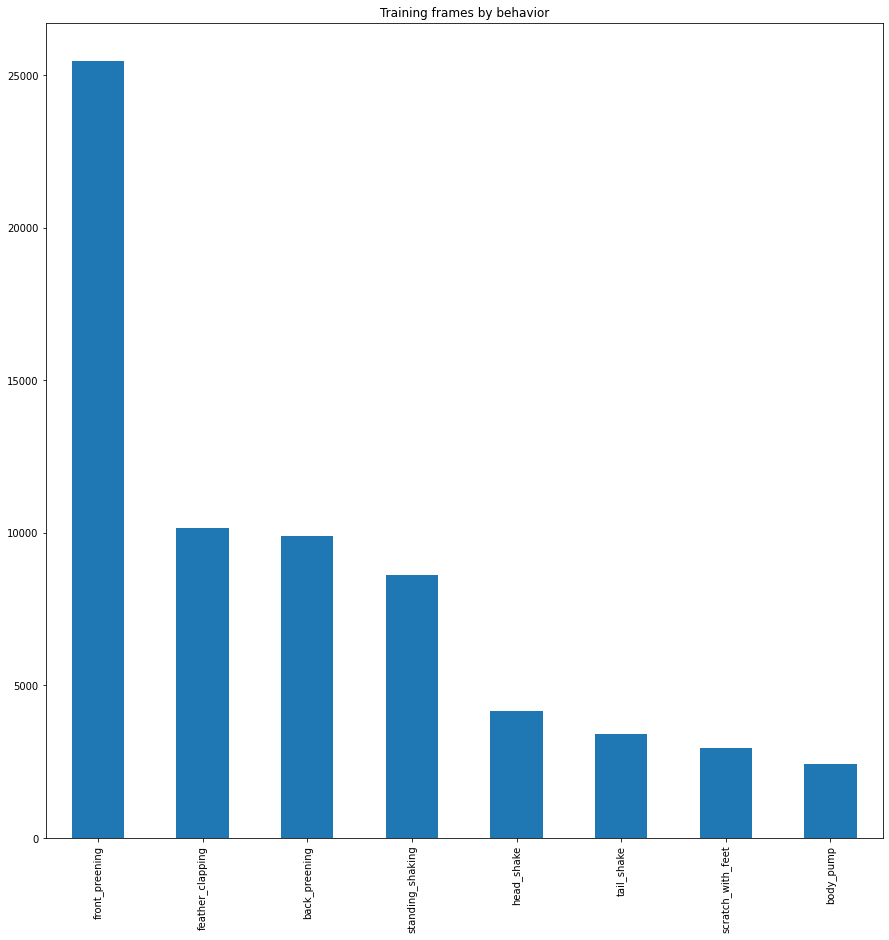

In [ ]:
df.behavior.unique()
df.behavior.value_counts().plot(kind='bar', figsize=(15,15), title='Training frames by behavior')

In [ ]:
def train_and_evaluate(df, features, timeslice_size, epochs, batch_size, verbose=0):
    segmented_timeseries, label_vector, label_names = ml.build_timeseries(df, features, timeslice_length)
    x_train, x_test, y_train, y_test = train_test_split(segmented_timeseries, label_vector, test_size=0.4, stratify=label_vector)
    model = ml.build_model(x_train, label_vector)
    hist = model.fit(x_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose)
    
    plt.plot(hist.history['loss'], label="Loss")
    plt.plot(hist.history['categorical_accuracy'], label="Accuracy")
    plt.legend()
    plt.show()
    
    results = model.evaluate(x_test, y_test, batch_size=batch_size)
    display(f"test loss: {results[0]}\ttest accuracy: {results[1]}")
            
    # getting predicted values for test data
    y_pred = model.predict(x_test)

    # matching true labels to predicted output
    y_true=np.argmax(y_test, axis=1)
    confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

    df_cm = pd.DataFrame(confusion)
    plt.figure(figsize = (12,10))

    sn.heatmap(df_cm, annot=True, fmt=".1f", xticklabels=label_names, yticklabels=label_names)
    plt.xlabel("Real Values", fontsize=20)
    plt.ylabel("Predicted Values", fontsize=20)
    plt.show()
    

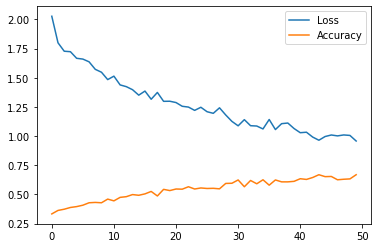

14/14 [==============================] - 0s 3ms/step - loss: 2.6398 - categorical_accuracy: 0.4251


'test loss: 2.639781951904297\ttest accuracy: 0.42505592107772827'

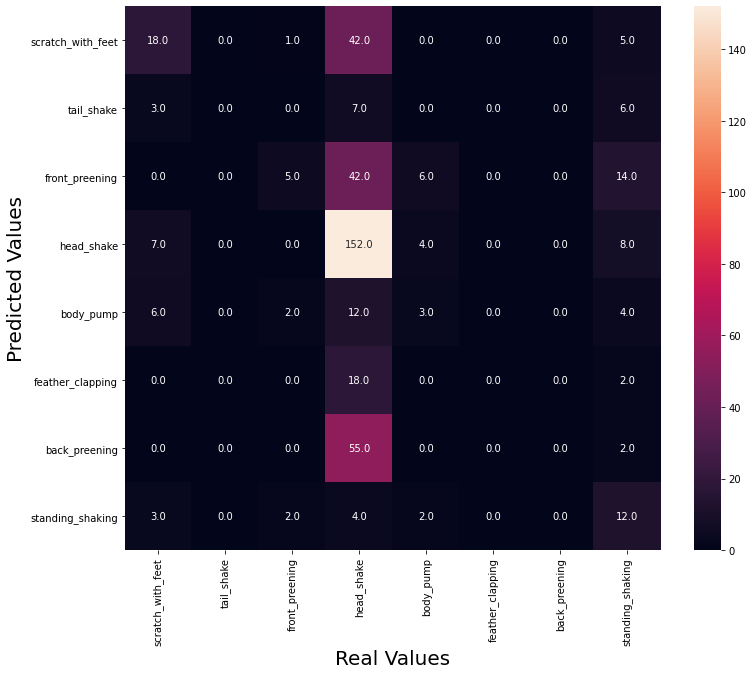

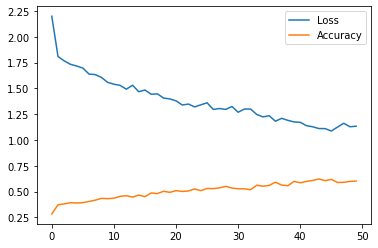

14/14 [==============================] - 0s 4ms/step - loss: 1.8373 - categorical_accuracy: 0.4228


'test loss: 1.8372770547866821\ttest accuracy: 0.42281877994537354'

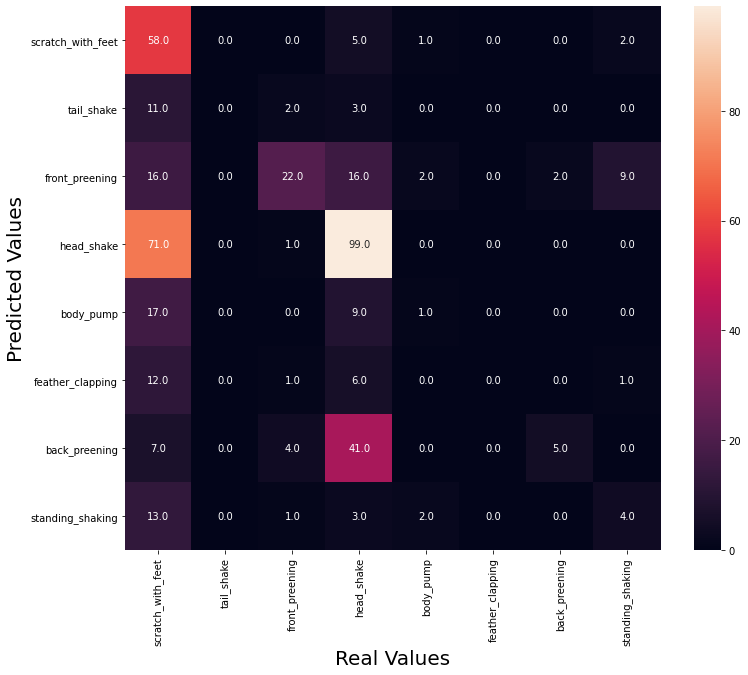

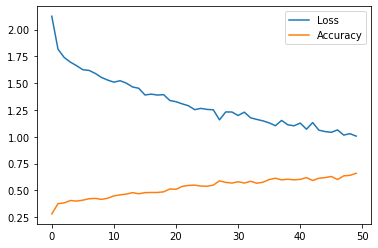

14/14 [==============================] - 0s 4ms/step - loss: 1.6549 - categorical_accuracy: 0.4541


'test loss: 1.6549015045166016\ttest accuracy: 0.45413869619369507'

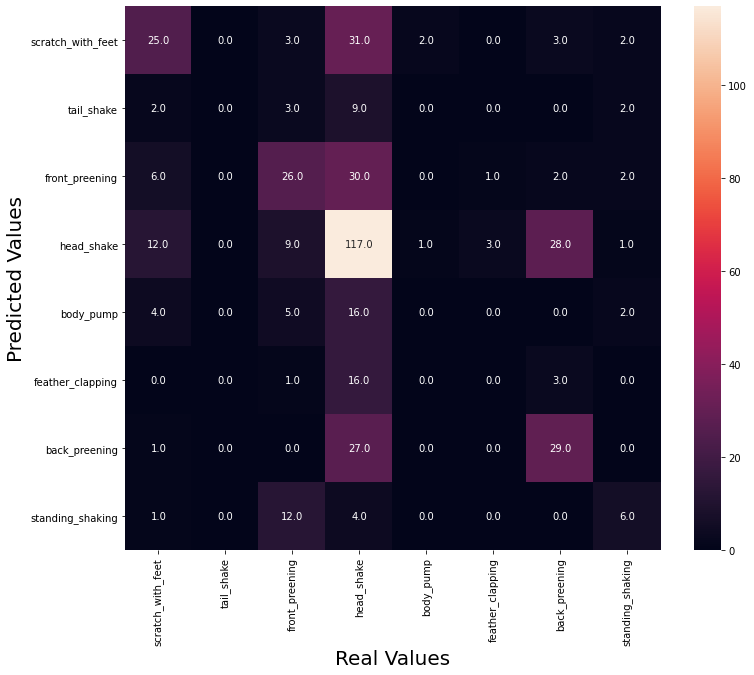

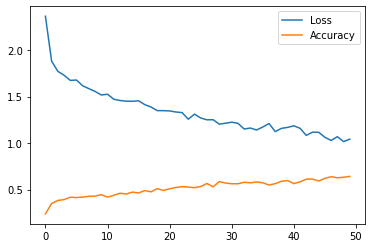

14/14 [==============================] - 0s 6ms/step - loss: 1.9026 - categorical_accuracy: 0.4228


'test loss: 1.9025540351867676\ttest accuracy: 0.42281877994537354'

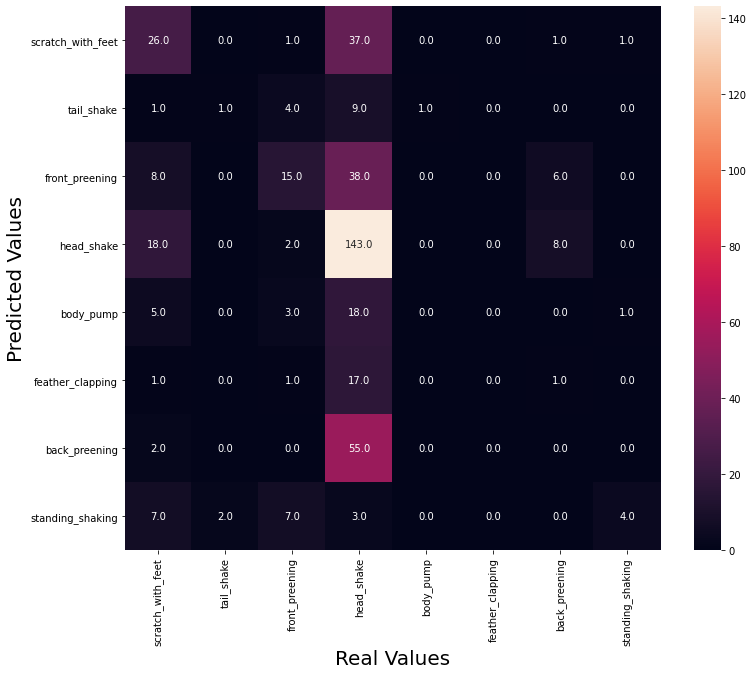

In [ ]:
features = [('head', 'x'), ('head', 'y'), ('tail', 'x')]

train_and_evaluate(df, features, 60, 50, 32)
train_and_evaluate(df, features, 120, 50, 32)
train_and_evaluate(df, features, 20, 50, 32)
train_and_evaluate(df, features, 180, 50, 32)